# Setup

In [1]:
%matplotlib inline
import timeit
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("NumPy   %s" % np.__version__)
print("Seaborn %s" % sns.__version__)

NumPy   1.12.1
Seaborn 0.7.1


In [3]:
!python --version

Python 2.7.13 :: Anaconda custom (x86_64)


In [4]:
# Set values to expand lists
vals = list(np.geomspace(10, 1000000, num=6, dtype='int'))

# timeit example
[timeit.timeit('xrange(%d)' % num) for num in vals]

[0.17449498176574707,
 0.15769195556640625,
 0.1640479564666748,
 0.1662590503692627,
 0.16181302070617676,
 0.16080117225646973]

---

# Plot Functions

In [5]:
def my_plot1(vals, times1, times2, time1_name='time 1', time2_name='time 2', title="", ylabel="", xlabel=""):
    '''
    Function to plot slow vs fast times with legend.
    '''
    plt.plot(np.log10(vals), times1);
    plt.plot(np.log10(vals), times2);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    plt.xticks(range(1,6));
    plt.legend([time1_name, time2_name])

In [6]:
def my_plot2(times1, times2, time1_name='time 1', time2_name='time 2', title="", ylabel="", xlabel=""):
    '''
    Function to plot slow vs fast times with legend.
    '''
    # Setup
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ind = np.arange(6)                
    width = 0.35
    # Plots
    bar1 = ax.bar(ind, times1, width, color='darkblue', log=True)
    bar2 = ax.bar(ind+width, times2, width, color='darkgreen', log=True)
    ax.legend( (bar1[0], bar2[0]), (time1_name, time2_name) );
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

---

# Looping Over A Collection

In [7]:
# Looping over a collection
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in xrange(len(colors))]        
    else:
        print('\nBetter')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in colors]

Bad
100000 loops, best of 3: 3.11 µs per loop
The slowest run took 5.88 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 22 µs per loop
1000 loops, best of 3: 197 µs per loop
100 loops, best of 3: 2.07 ms per loop
10 loops, best of 3: 21.9 ms per loop
1 loop, best of 3: 232 ms per loop

Better
100000 loops, best of 3: 2.32 µs per loop
100000 loops, best of 3: 14.2 µs per loop
10000 loops, best of 3: 124 µs per loop
1000 loops, best of 3: 1.62 ms per loop
10 loops, best of 3: 16.1 ms per loop
10 loops, best of 3: 135 ms per loop


In [8]:
def slow_collection():
    out = [timeit.timeit("[colors[i] for i in range(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection():
    out = [timeit.timeit("[color for color in colors]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [9]:
sc = slow_collection()
fc = fast_collection()

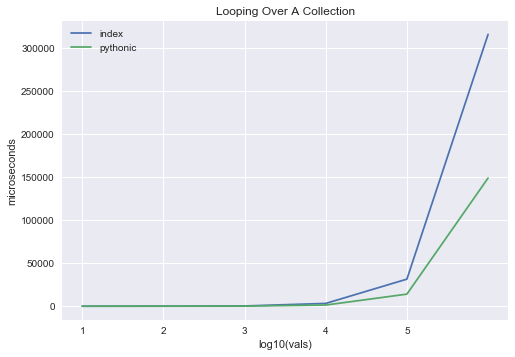

In [10]:
my_plot1(vals, sc, fc, time1_name='index', time2_name='pythonic',
         title="Looping Over A Collection", 
         xlabel="log10(vals)", 
         ylabel="microseconds")

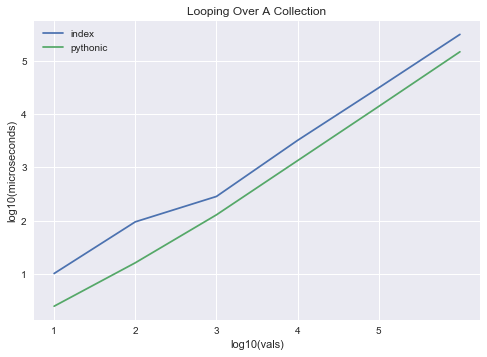

In [11]:
my_plot1(vals, np.log10(sc), np.log10(fc), time1_name='index', time2_name='pythonic',
        title="Looping Over A Collection", 
        xlabel="log10(vals)", 
        ylabel="log10(microseconds)")

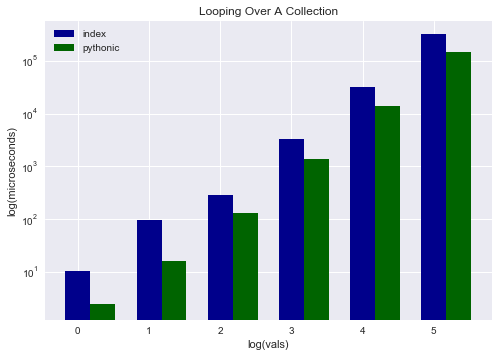

In [12]:
my_plot2(sc, fc, time1_name='index', time2_name='pythonic',
         title="Looping Over A Collection", 
         xlabel='log(vals)', 
         ylabel="log(microseconds)")

---

# Reversing A List

In [13]:
# LEGACY CODE

# Sorting lists
for choice in ['xrange', 'reversed']:   
    if choice is 'xrange':
        print('xrange')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [colors[i] for i in xrange(len(colors)-1, -1, -1)]     
    else:
        print('\nreversed')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [color for color in reversed(colors)]

xrange
The slowest run took 38.28 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.21 µs per loop
The slowest run took 7.00 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 22.3 µs per loop
10000 loops, best of 3: 212 µs per loop
100 loops, best of 3: 2.62 ms per loop
10 loops, best of 3: 25.4 ms per loop
1 loop, best of 3: 225 ms per loop

reversed
100000 loops, best of 3: 2.45 µs per loop
The slowest run took 26.06 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 14.7 µs per loop
10000 loops, best of 3: 122 µs per loop
1000 loops, best of 3: 1.34 ms per loop
100 loops, best of 3: 13.1 ms per loop
10 loops, best of 3: 137 ms per loop


In [14]:
def slow_sort():
    out = [timeit.timeit("[colors[i] for i in range(len(colors)-1, -1, -1)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_sort():
    out = [timeit.timeit("[color for color in reversed(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [15]:
ss = slow_sort()
fs = fast_sort()

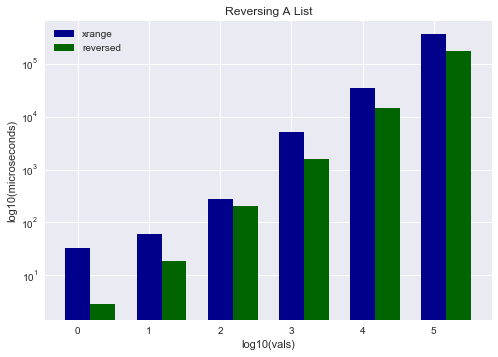

In [16]:
my_plot2(ss, fs, time1_name='xrange', time2_name='reversed',
         title="Reversing A List", 
         xlabel="log10(vals)", 
         ylabel="log10(microseconds)")

---

# Looping Over A Collection & Indices

In [17]:
# LEGACY CODE

# Looping over a collection and indices
for choice in ['xrange', 'enumerate']:   
    if choice is 'xrange':
        print('xrange')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i in xrange(len(colors))]
        
    else:
        print('\nenumerate')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            %timeit [(i, colors[i]) for i, color in enumerate(colors)]

xrange
The slowest run took 6.18 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.21 µs per loop
10000 loops, best of 3: 32.6 µs per loop
1000 loops, best of 3: 334 µs per loop
100 loops, best of 3: 4.21 ms per loop
10 loops, best of 3: 54.6 ms per loop
1 loop, best of 3: 571 ms per loop

enumerate
The slowest run took 4.54 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.89 µs per loop
10000 loops, best of 3: 39.6 µs per loop
1000 loops, best of 3: 416 µs per loop
100 loops, best of 3: 4.8 ms per loop
10 loops, best of 3: 61.4 ms per loop
1 loop, best of 3: 623 ms per loop


In [18]:
def slow_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i in xrange(len(colors))]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms
def fast_collection_indices():
    out = [timeit.timeit("[(i, colors[i]) for i, color in enumerate(colors)]",
                         "colors = ('red', 'green', 'blue', 'yellow')*%d" % val, number=10) for val in vals]
    return [i*10e4 for i in out] # for ms

In [19]:
sci = slow_collection_indices()
fci = fast_collection_indices()

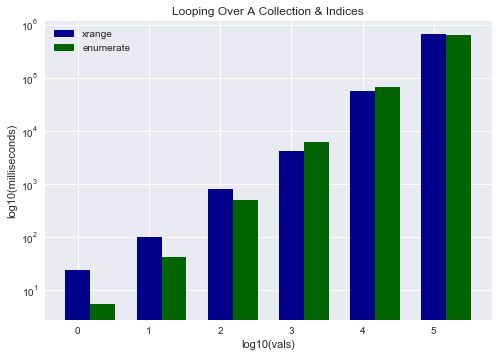

In [33]:
my_plot2(sci, fci, time1_name='xrange', time2_name='enumerate',
         title="Looping Over A Collection & Indices", 
         xlabel="log10(vals)", 
         ylabel="log10(milliseconds)")

---

# Looping Over Two Collections

In [21]:
# LEGACY CODE

# Loop over two collections
for choice in ['xrange', 'zip']:   
    if choice is 'xrange':
        print('xrange')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(names[i], colors[i]) for i in xrange(min(len(names), len(colors)))]
    else:
        print('\nzip')
        for val in vals:
            colors = ['red', 'green', 'blue', 'yellow']*val
            names = list('abcd')*val
            %timeit [(name, color) for name, color in zip(names, colors)]

xrange
The slowest run took 4.97 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.04 µs per loop
10000 loops, best of 3: 39.3 µs per loop
1000 loops, best of 3: 398 µs per loop
100 loops, best of 3: 4.81 ms per loop
10 loops, best of 3: 57.3 ms per loop
1 loop, best of 3: 589 ms per loop

zip
100000 loops, best of 3: 5.04 µs per loop
10000 loops, best of 3: 40 µs per loop
1000 loops, best of 3: 457 µs per loop
100 loops, best of 3: 5.95 ms per loop
10 loops, best of 3: 80.5 ms per loop
1 loop, best of 3: 823 ms per loop


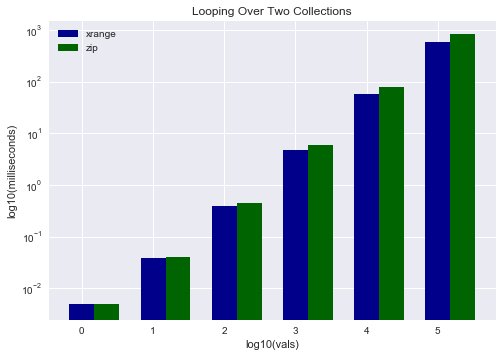

In [32]:
my_plot2([.00504, .0393, .398, 4.81, 57.3, 589], [.00504, .04, .457, 5.95, 80.5, 823], 
         time1_name='xrange', time2_name='zip',
         title="Looping Over Two Collections", 
         xlabel="log10(vals)", 
         ylabel="log10(milliseconds)")

---

# Appending Strings

In [22]:
# LEGACY CODE

# Appending Strings
my_string = ""
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('+=')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time for item in mylist: my_string += item
    else:
        print('\n.join')
        for val in vals:
            mylist = list('abcdefghijklmnopqrstuvwxyz')*val
            %time my_string = "".join([item for item in mylist])

+=
CPU times: user 111 µs, sys: 70 µs, total: 181 µs
Wall time: 133 µs
CPU times: user 1.16 ms, sys: 571 µs, total: 1.73 ms
Wall time: 1.28 ms
CPU times: user 7.05 ms, sys: 1.31 ms, total: 8.36 ms
Wall time: 7.43 ms
CPU times: user 56.2 ms, sys: 1.42 ms, total: 57.6 ms
Wall time: 56.9 ms
CPU times: user 599 ms, sys: 17.9 ms, total: 617 ms
Wall time: 609 ms
CPU times: user 5.63 s, sys: 44.5 ms, total: 5.68 s
Wall time: 5.66 s

.join
CPU times: user 33 µs, sys: 1.46 ms, total: 1.49 ms
Wall time: 1.49 ms
CPU times: user 254 µs, sys: 217 µs, total: 471 µs
Wall time: 342 µs
CPU times: user 2.31 ms, sys: 1.48 ms, total: 3.79 ms
Wall time: 2.73 ms
CPU times: user 21.7 ms, sys: 16.7 ms, total: 38.4 ms
Wall time: 27.3 ms
CPU times: user 195 ms, sys: 15.3 ms, total: 210 ms
Wall time: 209 ms
CPU times: user 1.87 s, sys: 91.3 ms, total: 1.96 s
Wall time: 1.96 s


---

# Using Standard Library

In [23]:
# Standard Library

for choice in ['listexp', 'map']:   
    if choice is 'listexp':
        print('listexp')
        for val in vals:
            %timeit [np.cumsum(item) for item in xrange(val)]
    else:
        print('\nmap')
        for val in vals:
            %timeit newlist = map(np.cumsum, xrange(val))

listexp
10000 loops, best of 3: 57.7 µs per loop
1000 loops, best of 3: 610 µs per loop
100 loops, best of 3: 5.68 ms per loop
10 loops, best of 3: 61.7 ms per loop
1 loop, best of 3: 592 ms per loop
1 loop, best of 3: 5.76 s per loop

map
10000 loops, best of 3: 54.9 µs per loop
1000 loops, best of 3: 576 µs per loop
100 loops, best of 3: 6.09 ms per loop
10 loops, best of 3: 60.5 ms per loop
1 loop, best of 3: 586 ms per loop
1 loop, best of 3: 5.57 s per loop


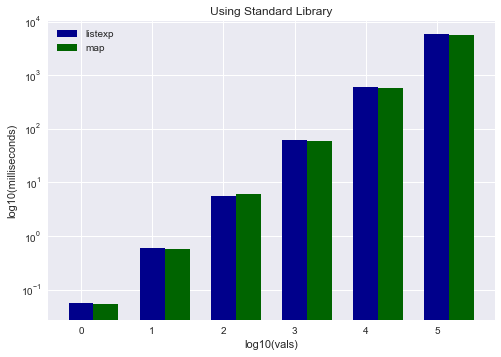

In [34]:
my_plot2([57.7e-3, 610e-3, 5.68, 61.7, 592, 5760], [54.9e-3, 576e-3, 6.09, 60.5, 586, 5.57e3], 
         time1_name='listexp', time2_name='map',
         title="Using Standard Library", 
         xlabel="log10(vals)", 
         ylabel="log10(milliseconds)")

---

# Listexp vs Genexp

In [24]:
# listexp vs genexp

for choice in ['listexp', 'genexp']:   
    if choice is 'listexp':
        print('listexp')
        for val in vals:
            %timeit [np.cumsum(item) for item in xrange(val)] # list expression
    else:
        print('\ngenexp')
        for val in vals:
            %timeit (np.cumsum(item) for item in xrange(val)) # generator expression

listexp
10000 loops, best of 3: 56 µs per loop
1000 loops, best of 3: 632 µs per loop
100 loops, best of 3: 6.33 ms per loop
10 loops, best of 3: 58.9 ms per loop
1 loop, best of 3: 577 ms per loop
1 loop, best of 3: 5.92 s per loop

genexp
The slowest run took 4.82 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 594 ns per loop
1000000 loops, best of 3: 563 ns per loop
1000000 loops, best of 3: 564 ns per loop
1000000 loops, best of 3: 561 ns per loop
The slowest run took 4.97 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 576 ns per loop
The slowest run took 8.78 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 570 ns per loop


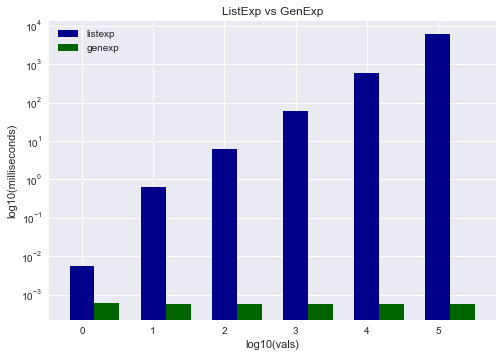

In [30]:
my_plot2([5.6e-3, 632e-3, 6.33, 58.9, 577, 5.92e3], [594e-6, 563e-6, 564e-6, 561e-6, 576e-6, 570e-6], 
         time1_name='listexp', time2_name='genexp',
         title="ListExp vs GenExp", 
         xlabel="log10(vals)", 
         ylabel="log10(milliseconds)")

---

# Dots

In [25]:
# Dots matter (marginally)
for choice in ['Bad', 'Better']:   
    if choice is 'Bad':
        print('Bad')
        newlist = []
        for val in vals:
            %timeit newlist.append(np.cumsum(val))
    else:
        print('\nBetter')
        newlist = []
        cumsum = np.cumsum
        append = newlist.append
        for val in vals:
            %timeit append(cumsum(val))

Bad
The slowest run took 11.66 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.33 µs per loop
The slowest run took 11.54 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.33 µs per loop
The slowest run took 13.80 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.02 µs per loop
The slowest run took 5.69 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.31 µs per loop
The slowest run took 12.30 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.29 µs per loop
The slowest run took 4.70 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.33 µs per loop

Better
The slowest run took 9.3

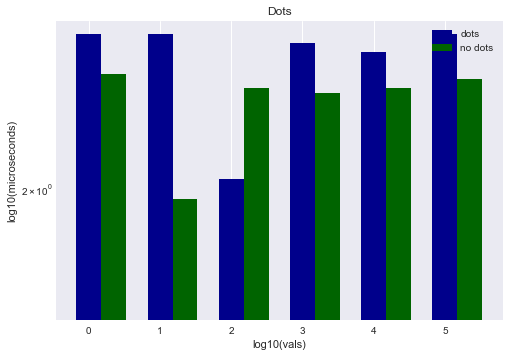

In [38]:
my_plot2([2.33, 2.33, 2.02, 2.31, 2.29, 2.33], [2.24, 1.98, 2.21, 2.2, 2.21, 2.23], 
         time1_name='dots', time2_name='no dots',
         title="Dots",
         xlabel="log10(vals)",
         ylabel="log10(microseconds)")

---
**Note: Mileage will vary with Python 3. Many performance enhancements were made like converting range() to a generator. See Py35 notebook for differences.**

---

## Links
[4 Performance Optimization Tips For Faster Python Code](http://blog.hackerearth.com/4-Performance-Optimization-Tips-Faster-Python-Code)  
[PythonSpeed Performance Tips](https://wiki.python.org/moin/PythonSpeed/PerformanceTips)  
[6 Python Performance Tips](https://dzone.com/articles/6-python-performance-tips)